# Regression

Bugun regression algoritmalarını detaylı şekilde göreceğiz

In [1]:
#pip install xlrd

In [2]:
import pandas as pd # data dosyalarını okumak için

In [3]:
df = pd.read_excel('cars.xls')

# EDA - Exloratory Data Analysis

In [4]:
df.head() # ilk bes satir

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
df.shape #satir ve sutun sayisi

(804, 12)

In [6]:
df.sample(5) # rastgele 5 satir

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
131,40966.607412,7476,Cadillac,STS-V6,Sedan 4D,Sedan,6,3.6,4,1,1,1
588,28502.306109,27199,Pontiac,GTO,Coupe 2D,Coupe,8,5.7,2,1,1,1
73,26302.074284,13050,Buick,Park Avenue,Special Ed Ultra 4D,Sedan,6,3.8,4,1,1,0
770,13258.365889,14938,Saturn,Ion,Sedan 4D,Sedan,4,2.2,4,1,1,1
673,36338.751328,18195,SAAB,9_3 HO,Arc Conv 2D,Convertible,4,2.0,2,1,1,0


In [7]:
df.info() # sutunlar hakkinda bilgi
# float64 ondalikli sayi , int64 tam sayi , object string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [8]:
df.describe() # istatistiksel bilgiler

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [9]:
df.corr(numeric_only=True) # korelasyon

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


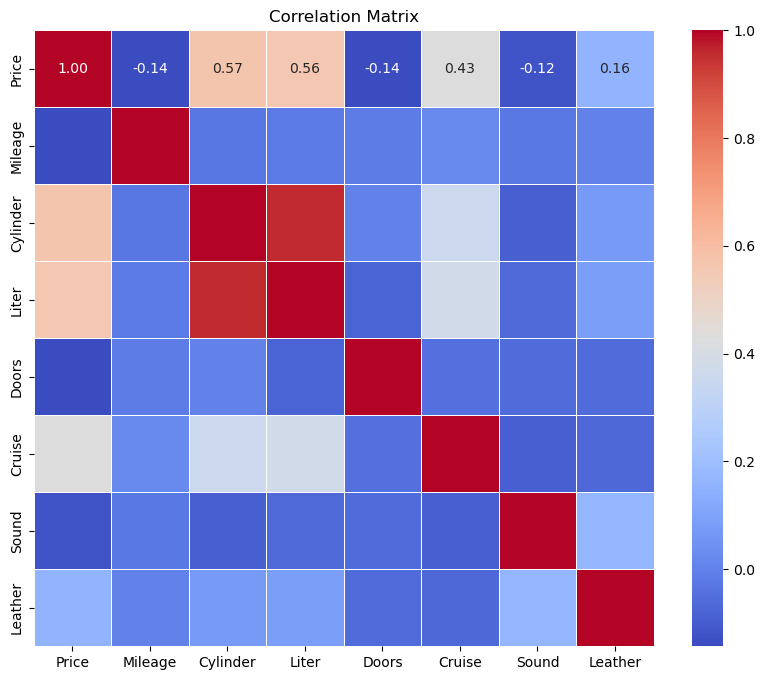

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [11]:
# outlier formulu ortalama +-3 * standart sapma

In [12]:
df['Price'].mean(), df['Price'].median(), df['Price'].min(), df['Price'].max(), df['Price'].std()



(21343.143767325837,
 18024.995019071903,
 8638.930895260657,
 70755.46671654288,
 9884.852800898007)

In [13]:
df.tail() # son bes satir

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
803,13585.636802,35662,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0


In [14]:
df.isnull().sum() # bos degerlerin sayisi

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [15]:
df['Make'].unique() # benzersiz degerler

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [16]:
df['Make'].nunique() # benzersiz degerlerin sayisi


6

In [17]:
df['Make'].value_counts() # benzersiz degerlerin sayisi ve buyukten kucuge siralanmasi

Make
Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: count, dtype: int64

In [18]:
df['Make'].value_counts(normalize=True) # benzersiz degerlerin sayisi ve buyukten kucuge siralanmasi yuzde olarak

Make
Chevrolet    0.398010
Pontiac      0.186567
SAAB         0.141791
Buick        0.099502
Cadillac     0.099502
Saturn       0.074627
Name: proportion, dtype: float64

[Text(0, 0, '80'),
 Text(0, 0, '80'),
 Text(0, 0, '320'),
 Text(0, 0, '150'),
 Text(0, 0, '114'),
 Text(0, 0, '60')]

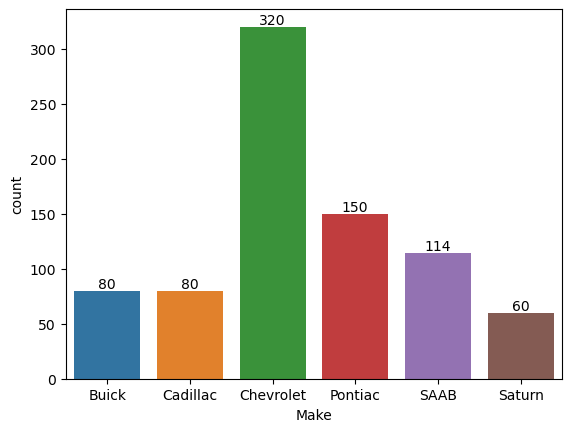

In [19]:
ax = sns.countplot(data=df, x='Make')
ax.bar_label(ax.containers[0])

<Axes: xlabel='count', ylabel='Cylinder'>

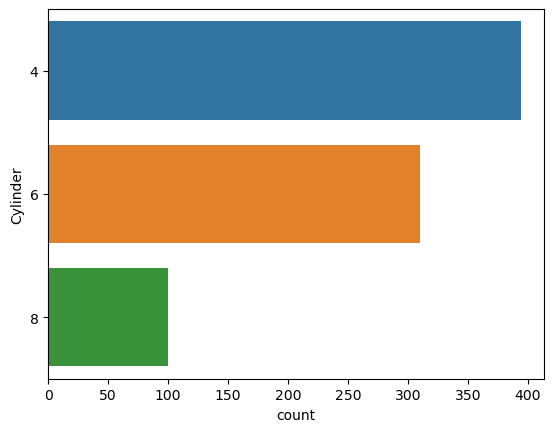

In [20]:
sns.countplot(data=df, y='Cylinder')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

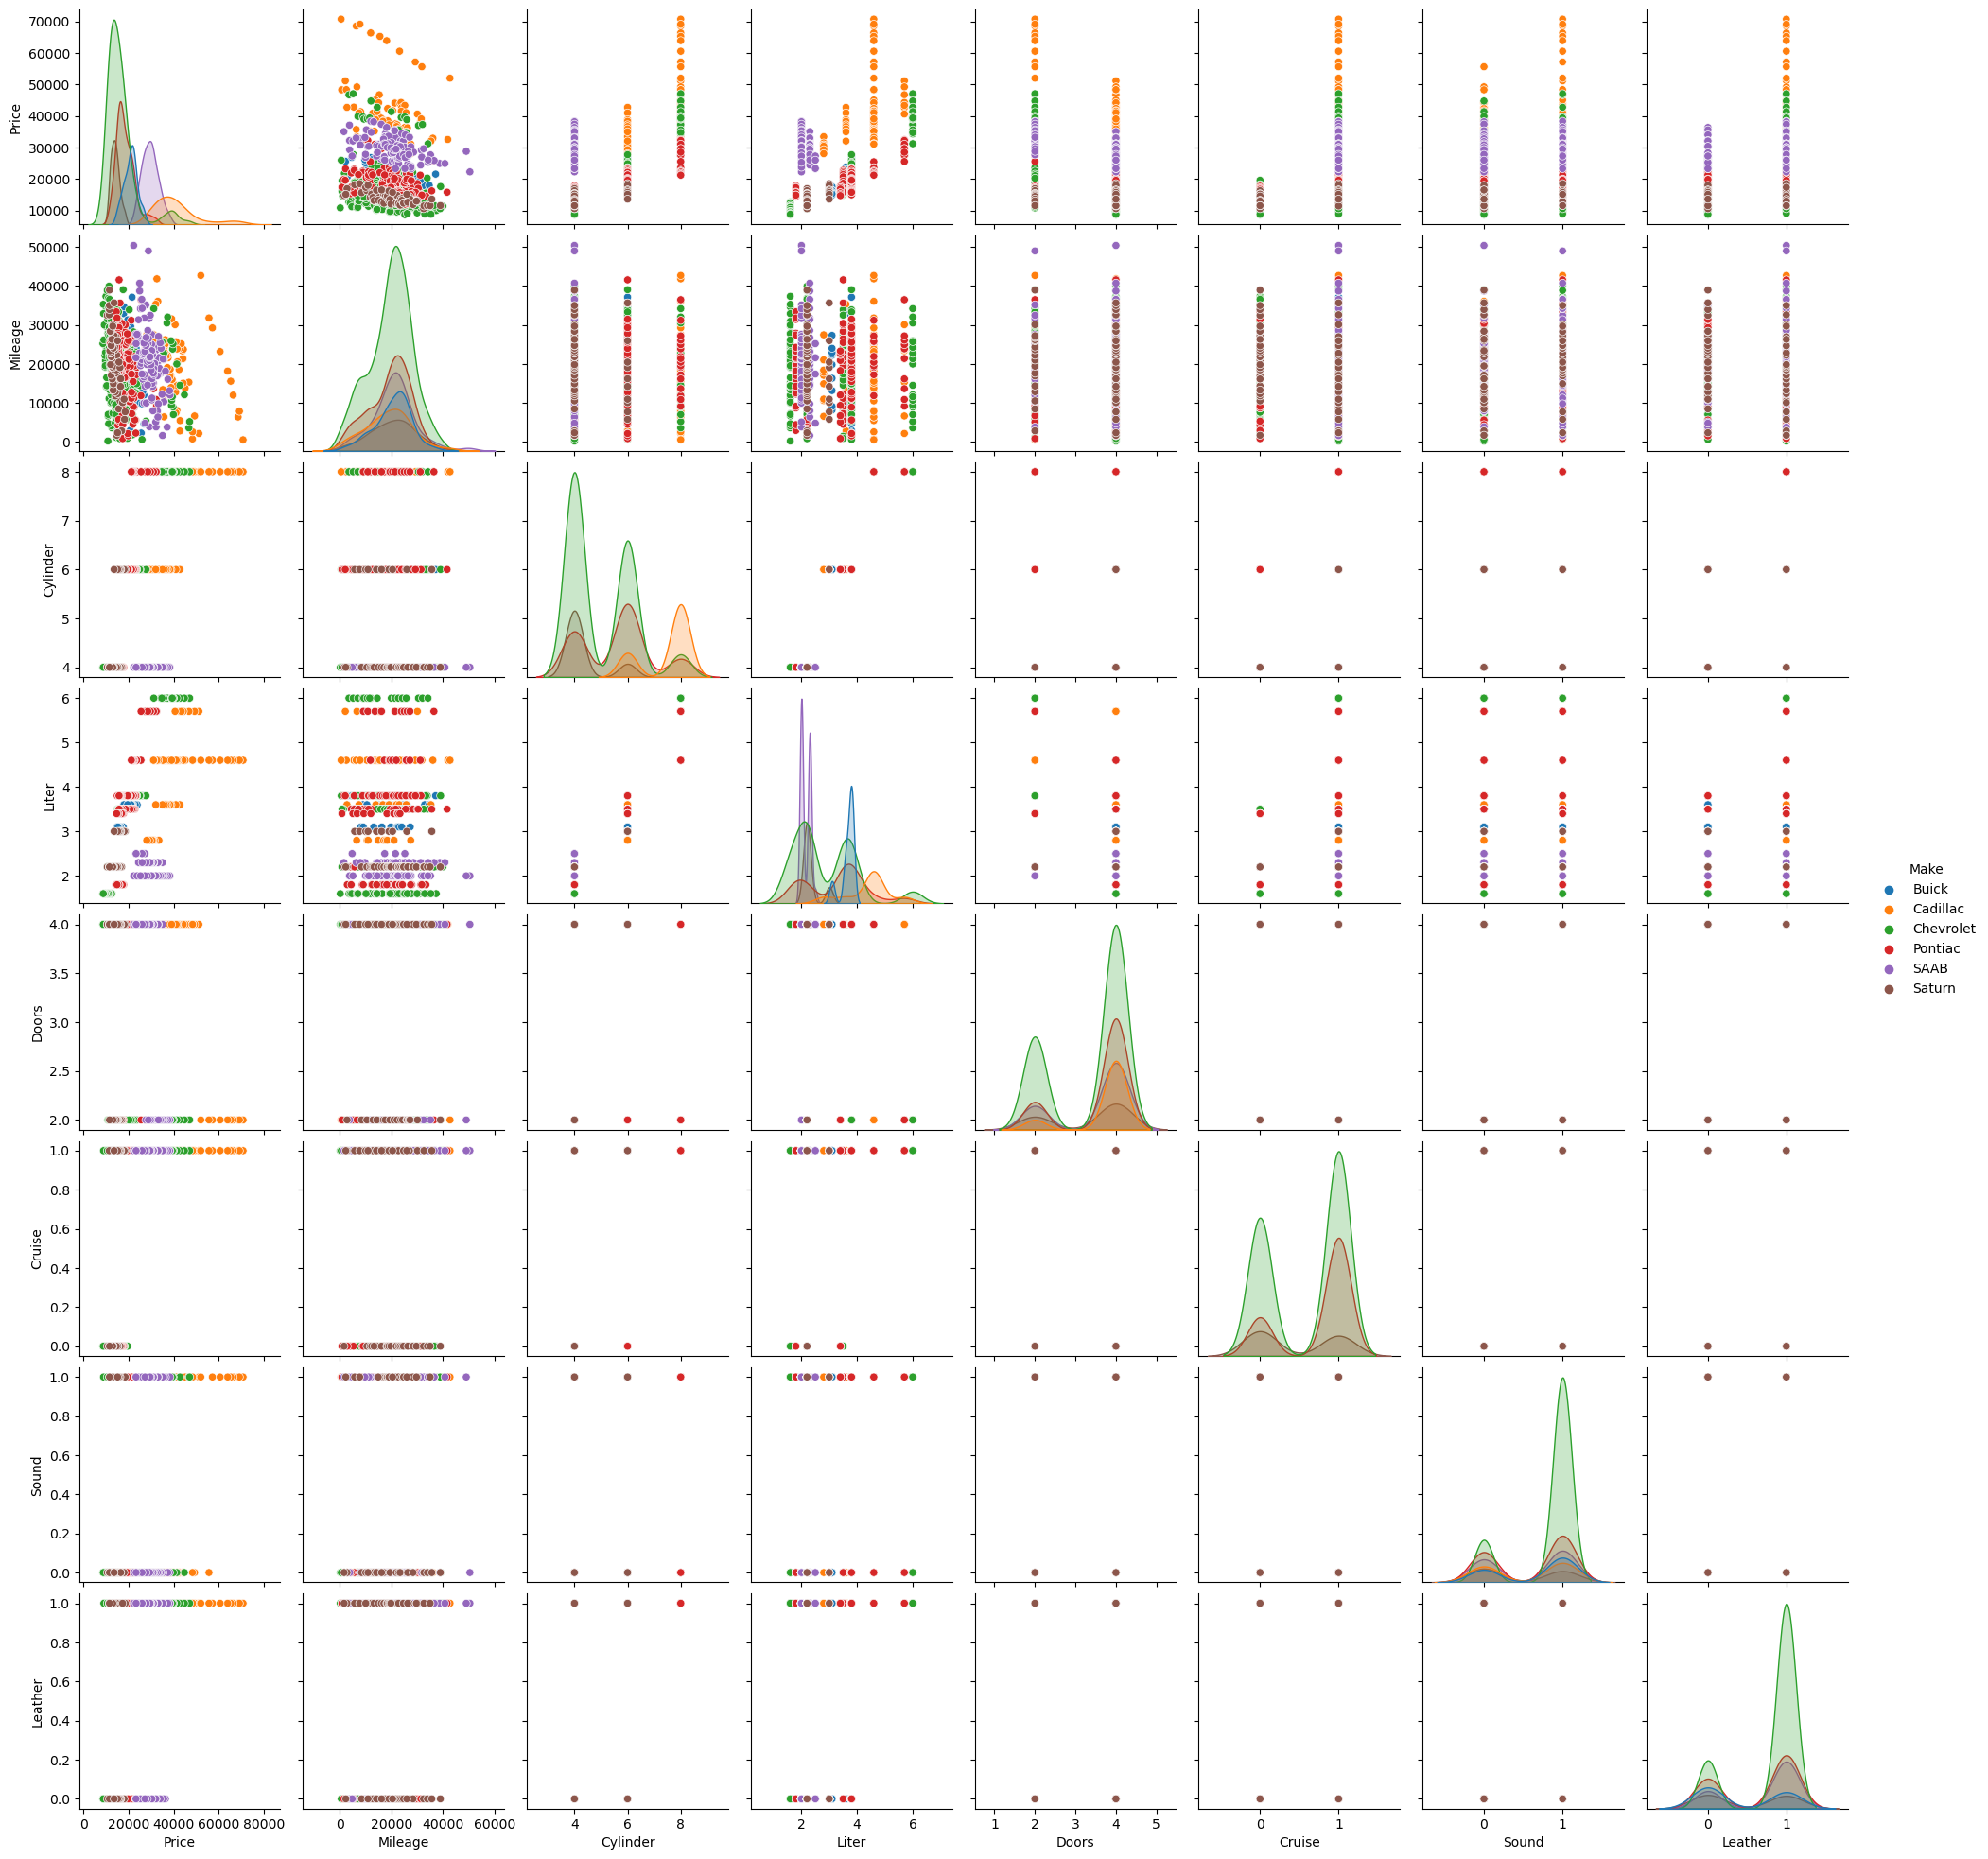

In [21]:
sns.pairplot(df, hue='Make');

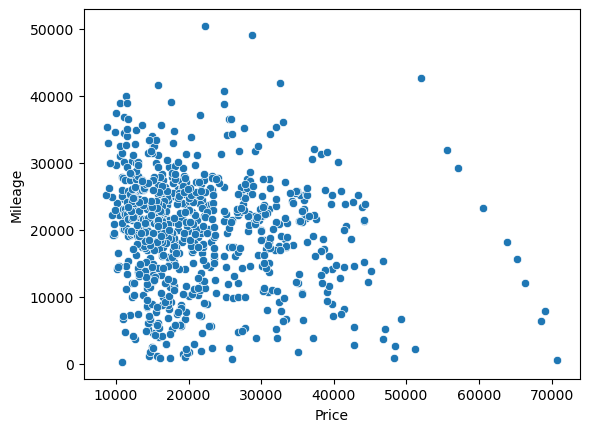

In [22]:
sns.scatterplot(x='Price', y='Mileage', data=df);

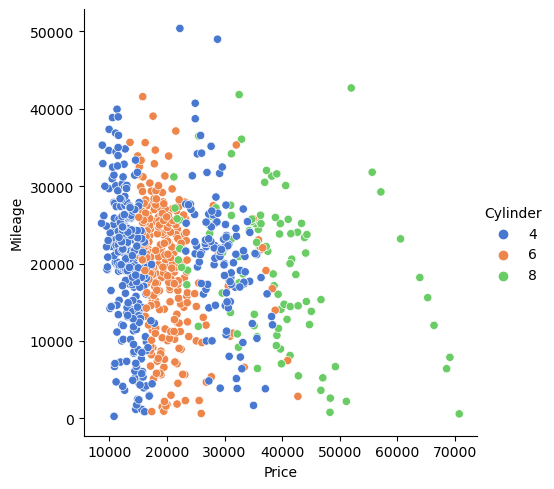

In [23]:
sns.relplot(x='Price', y='Mileage', data=df, hue='Cylinder', palette='muted');

## P Değeri Hesaplama

In [24]:
# Hipotez Testi
# H0 = arabanın fiyati ve uzerindeki km arasinda bir bag yok
# Ha = arabanin fiyati ve uzeindeki km arasinda bir bag var.
# p-value < 0.05 ise H0 reddedilir.
# p-value > 0.05 ise H0 reddedilmez.

In [25]:
from scipy.stats import ttest_ind

_, p = ttest_ind(df['Price'], df['Mileage'])
p  #0.0008662338227446263  H0 reddedilir.

0.0008662338227446263

In [26]:
# sonuc  p=0.0008662338227446263  oldugu icin H0 reddedilir. Alternatif kabul edilir.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


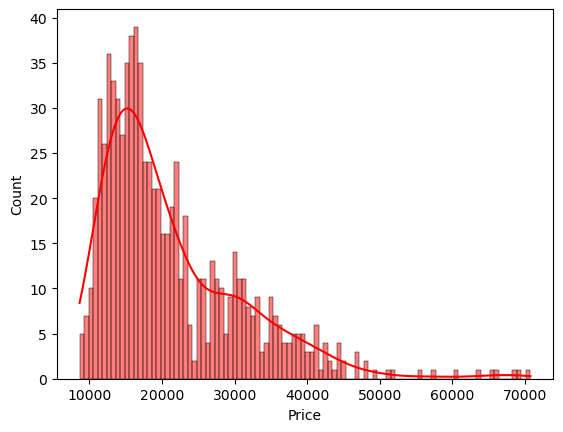

In [27]:
sns.histplot(data=df, x='Price', kde=True, color='red', bins=100);

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


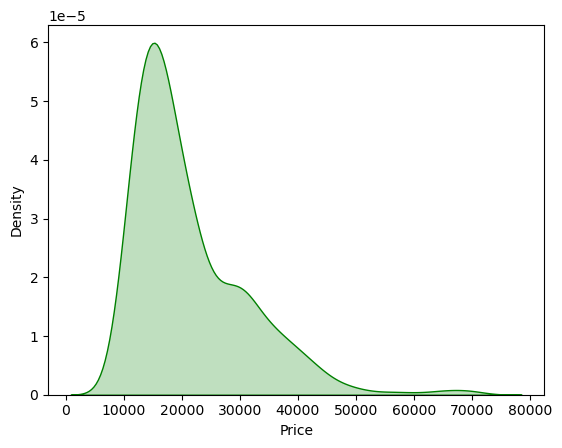

In [28]:
sns.kdeplot(data=df, x='Price', color='green', fill=True);

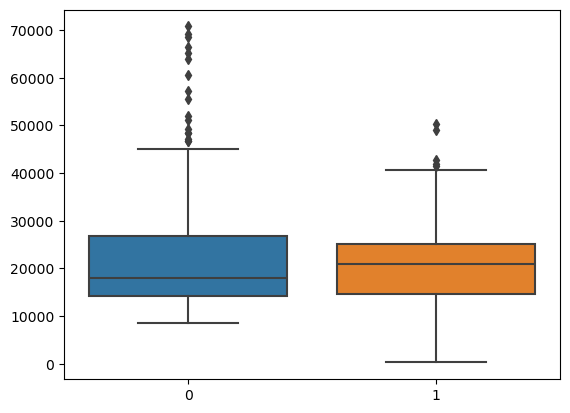

In [29]:
sns.boxplot([df.Price, df.Mileage]);

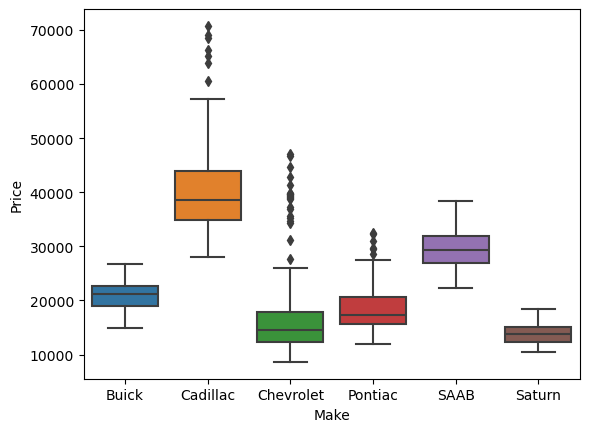

In [30]:
sns.boxplot(data=df, x='Make', y='Price');

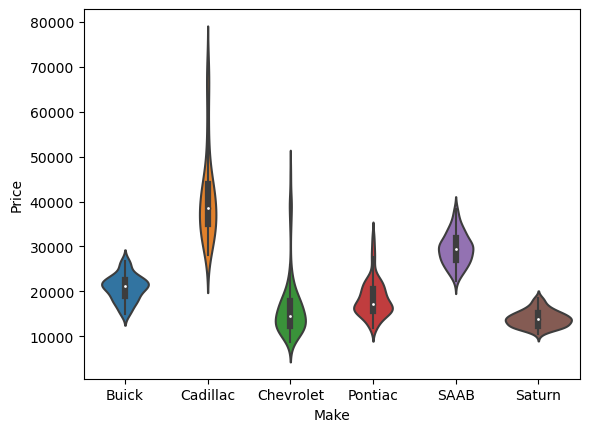

In [31]:
sns.violinplot(data=df, x='Make', y='Price');

In [32]:
import plotly.express as px 

In [33]:
px.bar(data_frame=df, x='Make', y='Price', color='Make', title='Make vs Price')

In [34]:
px.scatter_3d(df,x='Mileage', y = 'Price', z='Cylinder', color='Make', title='Mileage vs Price vs Cylinder')

In [35]:
px.sunburst(data_frame=df, path=['Make', 'Model', 'Trim'], values='Price', title='Make vs Model vs Year vs Price')

## Feature Engineering

In [36]:
df.corr(numeric_only=True)  

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [37]:
abs(df.corr(numeric_only=True))['Price'].sort_values(ascending=False)  # %20-%90 arasindakileri aliyoruz

Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Mileage     0.143051
Doors       0.138750
Sound       0.124348
Name: Price, dtype: float64

In [38]:
x = df[['Cylinder','Liter','Cruise','Mileage']]
y = df['Price']

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((643, 4), (643,), (161, 4), (161,))

## Modelling

In [41]:
from sklearn.linear_model import LinearRegression 

In [42]:
lr = LinearRegression()

In [43]:
model = lr.fit(x_train, y_train) # makine ogrenimi

In [44]:
tahmin = model.predict(x_test) # tahmin

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
mean_squared_error(y_test, tahmin) ** .5 # hata kareler ortalamasi

7413.255792158793

In [47]:
r2_score(y_test, tahmin) # r2 score

0.3071114906998017

# Label Encoding

In [170]:
x = df[['Mileage','Cylinder','Liter','Cruise', 'Make', 'Trim']]
y = df['Price']

In [171]:
x.sample(20)

,Mileage,Cylinder,Liter,Cruise,Make,Trim
726,23055,4,2.3,1,SAAB,Aero Sedan 4D
190,7278,4,1.6,0,Chevrolet,LT Sedan 4D
326,19818,4,2.2,0,Chevrolet,LT Sedan 4D
110,5499,8,4.6,1,Cadillac,DTS Sedan 4D
272,19816,4,2.2,1,Chevrolet,Sedan 4D
656,25049,4,2.0,1,SAAB,Aero Conv 2D
109,25421,8,4.6,1,Cadillac,DHS Sedan 4D
400,1480,6,3.5,1,Chevrolet,LS Sedan 4D
273,21492,4,2.2,1,Chevrolet,Sedan 4D
650,3828,4,2.0,1,SAAB,Aero Conv 2D


In [172]:
x = pd.get_dummies(x, drop_first=True)
x.head()

,Mileage,Cylinder,Liter,Cruise,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Trim_Aero Conv 2D,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
0,8221,6,3.1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,9135,6,3.1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,13196,6,3.1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,16342,6,3.1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,19832,6,3.1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [173]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [174]:
model = lr.fit(x_train, y_train) # makine ogrenimi

In [175]:
tahmin = model.predict(x_test) # tahmin

In [176]:
mean_squared_error(y_test, tahmin) ** .5 # hata kareler ortalamasi

1523.6314728711297

In [177]:
r2_score(y_test, tahmin) # r2 score

0.9707311770106379

In [178]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [179]:
R = Ridge()
L = Lasso()
E = ElasticNet()

In [180]:
Rmodel = R.fit(x_train, y_train) # makine ogrenimi

In [181]:
Rtahmin = Rmodel.predict(x_test) # tahmin

In [182]:
mean_squared_error(y_test, Rtahmin) ** .5 # hata kareler ortalamasi

1575.6786242840062

In [183]:
r2_score(y_test, Rtahmin) # r2 score

0.9686973810318732

In [184]:
Lmodel = L.fit(x_train, y_train) # makine ogrenimi

In [185]:
Ltahmin = Lmodel.predict(x_test) # tahmin

In [186]:
mean_squared_error(y_test, Ltahmin) ** .5 # hata kareler ortalamasi

1527.043092830227

In [187]:
r2_score(y_test, Ltahmin) # r2 score

0.9705999564419019

In [188]:
Emodel = E.fit(x_train, y_train) # makine ogrenimi

In [189]:
Etahmin = Emodel.predict(x_test) # tahmin

In [190]:
mean_squared_error(y_test, Etahmin) ** .5 # hata kareler ortalamasi

5916.121656152222

In [191]:
r2_score(y_test, Etahmin) # r2 score

0.558714578586518

In [192]:
def model(x, y, model):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model = model.fit(x_train, y_train)
    pred = model.predict(x_test)
    return mean_squared_error(y_test, pred)**0.5, r2_score(y_test, pred)

In [193]:
model(x,y,R)

(1575.6786242840062, 0.9686973810318732)

In [194]:
model(x,y,L)


(1527.043092830227, 0.9705999564419019)

In [195]:
model(x,y,E)


(5916.121656152222, 0.558714578586518)

In [196]:
# Coefficients - Katsayilar

In [197]:
lr.coef_

array([-1.98809431e-01, -2.60219053e+03,  7.38331957e+03, -1.05024563e+02,
        1.55364461e+04, -2.81688090e+03, -3.59594608e+03,  6.85100028e+03,
       -2.29878609e+03,  3.90588224e+03, -2.64773527e+03, -1.26995361e+03,
        7.05993990e+03, -2.22310734e+02,  1.38127365e+02, -8.04390904e+03,
       -6.79607391e+03, -6.85437716e+03,  3.54018314e+03, -5.72790226e+03,
       -1.11979437e+04, -8.32030557e+03, -7.59431897e+03, -8.10925499e+03,
       -6.53924263e+03, -3.82628105e+02, -5.76220228e+03, -3.63992297e+03,
        1.67584142e+04, -5.32327214e+03, -7.83067529e+03, -4.64523486e+03,
       -7.53303979e+03, -6.65186020e+03, -7.63546793e+03, -6.87040602e+03,
       -6.33606759e+03, -3.92489639e+03, -7.03882417e+03, -6.17480932e+03,
       -8.14421976e+03,  4.52867027e+03, -2.53728086e+03, -2.10433902e+03,
       -7.88530569e+03, -6.07227049e+03, -6.65263910e+03, -5.53516395e+03,
       -4.78023915e+03, -3.13661125e+03, -6.92039280e+03, -5.51518953e+03,
       -7.77024475e+03, -

In [198]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

feature_importance = pd.DataFrame({'feature': x_train.columns, 'Coefs': lr.coef_})
feature_importance = feature_importance.sort_values(by='Coefs', ascending=False)

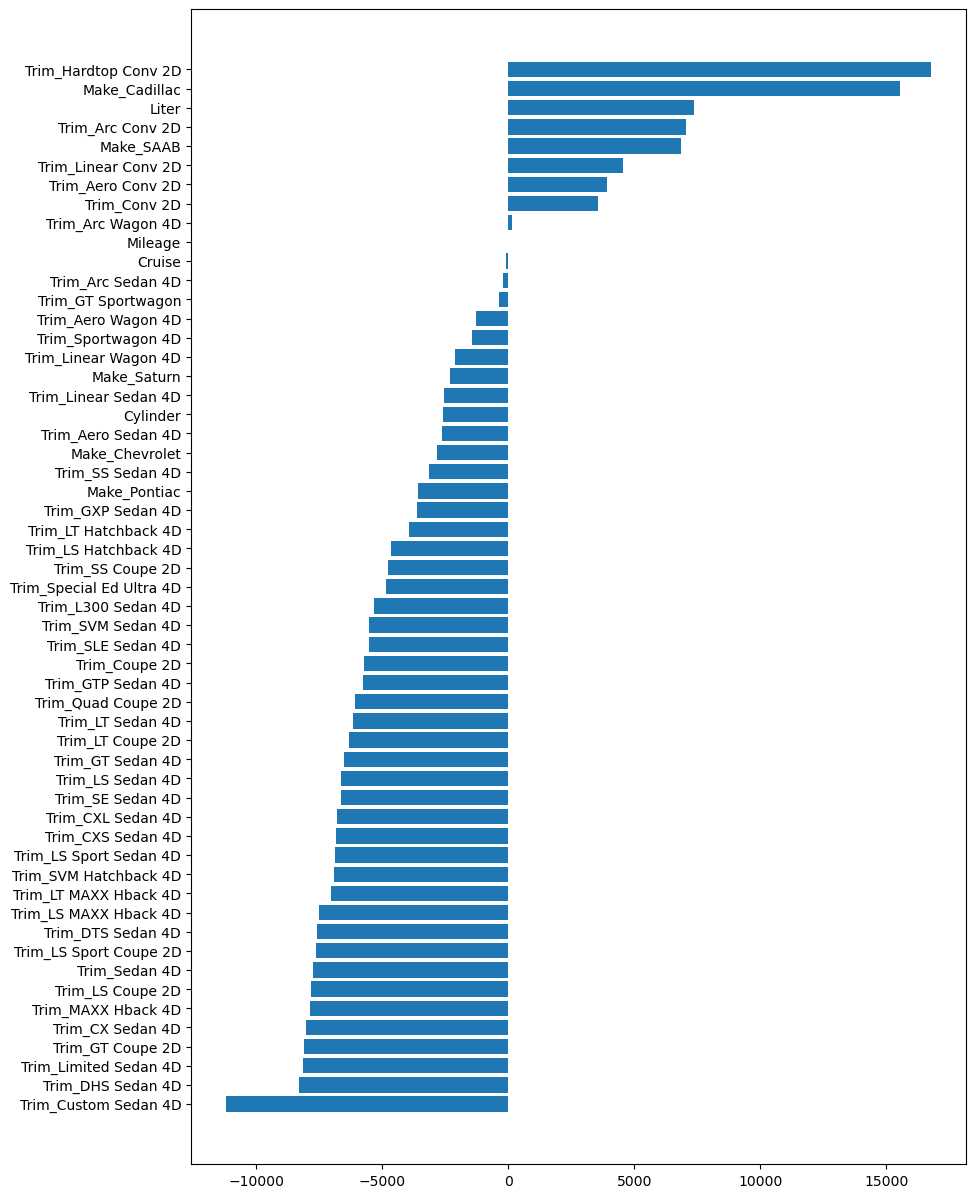

In [199]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 15))
plt.barh(feature_importance.feature, feature_importance.Coefs)
plt.gca().invert_yaxis()
plt.show()

## Ressionda basari orani icin bilinmesi gerekenler:
1 - R2 Score: > 0.85 

2 - Dusuk RMSE

3 - Residuals normal dagilimli olmali

In [200]:
residuals =y_test - tahmin 
residuals

192     559.667911
717    1027.528386
168    1144.233441
522    2909.433116
536     494.086073
          ...     
658    -812.069687
356    4025.396437
525    2361.161783
748    -961.806180
517    3242.062971
Name: Price, Length: 161, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



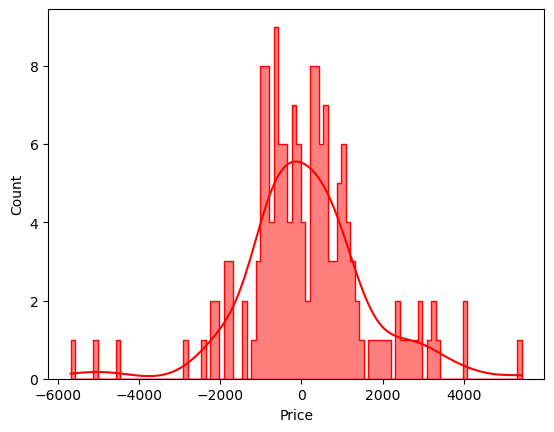

In [201]:
sns.histplot(residuals, kde=True, bins=100, color='red', alpha=0.5, label='Residuals', element='step');

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



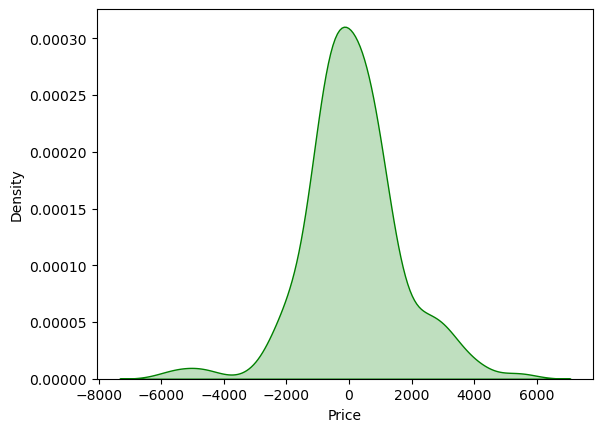

In [203]:
sns.kdeplot(residuals, color='green', fill=True);

In [204]:
from sklearn.tree import DecisionTreeRegressor

In [205]:
df = DecisionTreeRegressor()

In [211]:
model(x,y,df)

(1774.550561483327, 0.9602971078484801)

In [212]:
from sklearn.ensemble import ExtraTreesRegressor

Ex = ExtraTreesRegressor()
model(x,y,Ex)

(896.5513623643357, 0.9898656537654521)